This notebook is also available at https://github.com/mersad95zd/Deep_Neural_Network.

In [1]:
__author__ = 'tan_nguyen' + ' + ' + 'mohammad zalbagi darestani'
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from time import time

In [2]:
def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

In [3]:
def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()


###################################################################################
#####################################
# YOUR ASSSIGMENT STARTS HERE
FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
###################################################################################
#####################################

In [4]:
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim,
        actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh',
        'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / \
        np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / \
        np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))
    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: activations
        '''
        # YOU IMPLEMENT YOUR actFun HERE
        
        ReLu = lambda x: np.array( [ [0  if u[i] <= 0 else u[i] for i in range(len(u))] for u in x] )
        Tanh = lambda x: (np.exp(2*x)-1)/(np.exp(2*x)+1)
        Sigmoid = lambda x: 1/(1+np.exp(-x))
        
        actFuncs = {"ReLu":ReLu, "Tanh":Tanh, "Sigmoid":Sigmoid}
        
        a = actFuncs[type](z)
        
        return a
    def diff_actFun(self, z, type):
        '''
        diff_actFun compute the derivatives of the activation functions wrt the net
        input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''
        # YOU IMPLEMENT YOUR diff_actFun HERE
        difReLu = lambda x: np.array( [ [0  if u[i] <= 0 else 1 for i in range(len(u))] for u in x] )
        #difTanh = lambda x: 4*np.exp(2*x)/( (np.exp(2*x)+1)^2 )
        difTanh = lambda x: 1 - np.power(self.actFun(x,'Tanh'),2)
        difSigmoid = lambda x: np.exp(-x)/( (1+np.exp(-x))**2 )
        
        difFuncs = {"ReLu":difReLu, "Tanh":difTanh, "Sigmoid":difSigmoid}
        
        da = difFuncs[type](z)
        return da
    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two
        probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''
        #print(X.dot(self.W1)+self.b1)
        # YOU IMPLEMENT YOUR feedforward HERE
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.actFun(self.z1,self.actFun_type)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.probs = np.exp(self.z2) / np.sum(np.exp(self.z2),axis = 1, keepdims=True)
        return self.probs
    def calculate_loss(self, X, y):
        '''
        calculate_loss compute the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, self.actFun) #lambda x: self.actFun(x, type=self.actFun_type))
        
        # Calculating the loss
        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        # preparing one-hot labels
        Y = []
        for l in y:
            Y.append(np.array([not l,l]))
        Y = np.array(Y)
        
        data_loss = 0
        for i in range(len(Y)):
            data_loss += Y[i].dot(np.log(self.probs[i]))
        data_loss /= num_examples
        
        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) +
        np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss
    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)
    def backprop(self, X, y):
        '''
        backprop run backpropagation to compute the gradients used to update the
        parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''
        # IMPLEMENT YOUR BACKPROP HERE
        Y = []
        for l in y:
            Y.append(np.array([not l,l]))
        Y = np.array(Y)
        
        temp1 = self.probs - Y
        temp2 = temp1.dot(self.W2.T) * self.diff_actFun(self.z1,self.actFun_type)
        dW2 = (self.a1.T).dot(temp1)
        db2 = np.sum(temp1,axis=0,keepdims=True)
        dW1 = np.dot(X.T,temp2)
        db1 = np.sum(temp2,axis=0)
        return dW1, dW2, db1, db2
    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the
        whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)
            # Add derivatives of regularization terms (b1 and b2 don't have
            # regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1
            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want
            # to do it too often.
            if print_loss and i % 4000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X,y)))
    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plot the decision boundary created by the
        trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)

# 1.a. Dataset

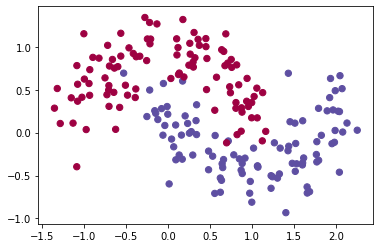

In [5]:
def main():
# # generate and visualize Make-Moons dataset
    X, y = generate_data()
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()
    #model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='ReLu')
    #print(model.feedforward(X,model.actFun_type))
    #model.fit_model(X,y)
    #model.visualize_decision_boundary(X,y)
if __name__ == "__main__":
    main()

## 1.b. Activation function

1) I filled in actFun in cell 4 <br>
2) \begin{equation*}
Relu'(x) = 0 \quad if \quad x <= 0, \quad = 1 \quad if \quad x > 0 \\\
Tanh'(x) = \frac{4e^{2x}}{(e^{2x}+1)^2} \\\
Sigmoid'(x) = \frac{e^{-x}}{(1+e^{-x})^2}
\end{equation*}
3) I filled in diff_actFun in cell 4

# 1.c. Build the Neural Network

1) I filled in feedforward in cell 4 <br>
2) I filled in calculate_loss in cell 4

# 1.d. Backward pass - Backpropagation

1) \begin{equation*}
\frac{dL}{dW_2} = a_1^T (\hat{y} - y) \\\
\frac{dL}{db_2} = \hat{y} - y \\\
\frac{dL}{dW_1} = X^T act'(z_1) (\hat{y}-y)W_2^T \\\
\frac{dL}{db_1} = act'(z_1) (\hat{y}-y)W_2^T
\end{equation*}
2) I filled in backprop in cell 4

# 1.e. Time to Have Fun - Training!
1)

ReLu:
Loss after iteration 0: -0.002578
Loss after iteration 4000: 0.003486
Loss after iteration 8000: 0.003501
Loss after iteration 12000: 0.003496
Loss after iteration 16000: 0.003497
Training Time: 43.2 seconds


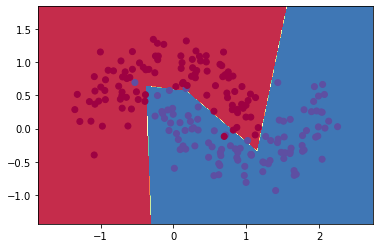

Tanh:
Loss after iteration 0: -0.001940
Loss after iteration 4000: 0.003245
Loss after iteration 8000: 0.003295
Loss after iteration 12000: 0.003301
Loss after iteration 16000: 0.003301
Training Time: 14.1 seconds


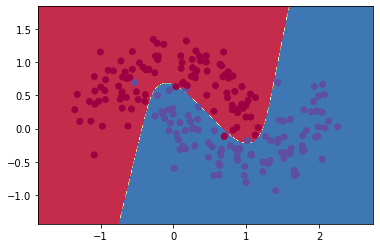

Sigmoid:
Loss after iteration 0: -0.002936
Loss after iteration 4000: 0.010979
Loss after iteration 8000: 0.011285
Loss after iteration 12000: 0.011317
Loss after iteration 16000: 0.011319
Training Time: 13.5 seconds


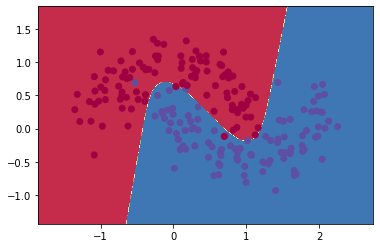

In [6]:
def main():
# # generate and visualize Make-Moons dataset
    acts = ['ReLu','Tanh','Sigmoid']
    X, y = generate_data()
    for act in acts:
        print(act+":")
        s = time()
        model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type=act)
        model.fit_model(X,y)
        print("Training Time:", round(time()-s,1),"seconds")
        model.visualize_decision_boundary(X,y)
if __name__ == "__main__":
    main()

<div style="text-align: justify"> As shown above, the network trained with ReLu or Tanh achieves a lower loss (Tanh is even slightly better than ReLu) compared with utilizing Sigmoid function. Furthermore, Sigmoid and Tanh give us a smooth decision boundary compared with ReLu and this difference lies at the nature of these functions (Tanh and Sigmoid are smooth at the breaking points of the decision boundary while ReLu is sharp and non-smooth).</div> <br>
2)

hidden dimension: 3
Loss after iteration 0: -0.001940
Loss after iteration 4000: 0.003245
Loss after iteration 8000: 0.003295
Loss after iteration 12000: 0.003301
Loss after iteration 16000: 0.003301
Training Time: 14.2 seconds


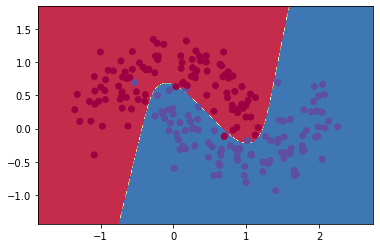

hidden dimension: 12
Loss after iteration 0: -0.002891
Loss after iteration 4000: 0.010510
Loss after iteration 8000: 0.013019
Loss after iteration 12000: 0.013801
Loss after iteration 16000: 0.014136
Training Time: 16.9 seconds


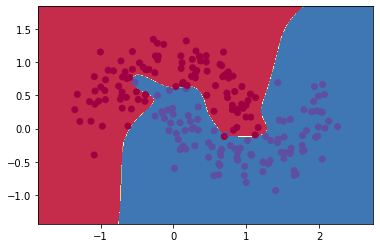

hidden dimension: 21
Loss after iteration 0: -0.001348
Loss after iteration 4000: 0.009891
Loss after iteration 8000: 0.013106
Loss after iteration 12000: 0.014605
Loss after iteration 16000: 0.015083
Training Time: 19.9 seconds


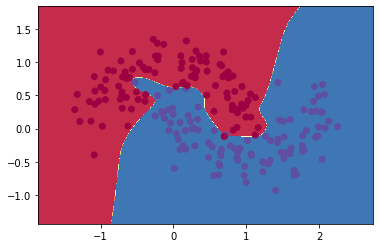

hidden dimension: 30
Loss after iteration 0: -0.000798
Loss after iteration 4000: 0.010160
Loss after iteration 8000: 0.013046
Loss after iteration 12000: 0.014123
Loss after iteration 16000: 0.014533
Training Time: 22.7 seconds


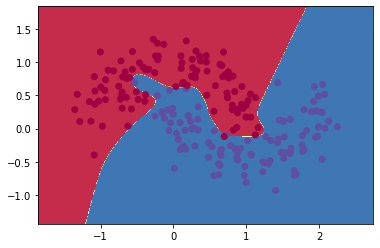

In [7]:
def main():
# # generate and visualize Make-Moons dataset
    X, y = generate_data()
    hiddens = np.linspace(3,30,4,dtype="int")
    for hdim in hiddens:
        print("hidden dimension:",hdim)
        s = time()
        model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=hdim , nn_output_dim=2, actFun_type="Tanh")
        model.fit_model(X,y)
        print("Training Time:", round(time()-s,1),"seconds")
        model.visualize_decision_boundary(X,y)
if __name__ == "__main__":
    main()

<div style="text-align: justify"> Increasing the number of hidden units means more degrees of freedom, and that means having a more complex model, and that means the model moves toward overfitting. This can be seen both in the loss values as well as the shape of the decision boundary. However, because of the nature of this dataset which has a number of hard-to-fit outliers, we may not expect the loss to become 0 by increasing the number of hidden units. One last thing to note is the runtime which obviously increases by increasing model complexity.</div>

# 1.f. Even More Fun - Training a Deeper Network!!!

<div style="text-align: justify"> I defined class DeepNeuralNetwork which inherits the class NeuralNetwork (as mentioned in the hints). I defined a new __init__ function to override the one defined by the parent class. In this function, I changed the weight and bias initialization such that we have two cells, one containing all Ws and one containing all bs. Based on this change and defining a new class Layer, I changed feedforward and backpropagation functions for the DeepNeuralNetwork class. Class Layer has 2 main attributes: ff and bp. One calculates feedforward for a given layer and the other calculates backprop for it. The bp attribute was inspired by this formula
\begin{equation*}
\delta^l = \delta^{l+1}(W^{l+1})^Tact'z_l
\end{equation*}
One last change was decreasing \epsilon to 0.001 rather than 0.01, since for deep networks, 0.01 is large and results in divergence.
Lastly, I tried to name the parameters such that they're easy to interprete, therefore I didn't add comments for them.
</div>

In [8]:
class DeepNeuralNetwork(NeuralNetwork):
    """
    This class builds and trains a deep neural network
    """
    def __init__(self, nn_input_dim, num_hidden_layers, nn_hidden_dim , nn_output_dim,
        actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param num_hidden_layers: the number of hidden layers
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh',
        'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.num_hidden_layers = num_hidden_layers
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W = []
        self.b = []
        for n in range(self.num_hidden_layers+1):
            if n == 0:
                self.W.append( np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim) )
                self.b.append( np.zeros((1, self.nn_hidden_dim)) )
            elif n == self.num_hidden_layers:
                self.W.append( np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim) )
                self.b.append( np.zeros((1, self.nn_output_dim)) )
            else:
                self.W.append( np.random.randn(self.nn_hidden_dim, self.nn_hidden_dim) / np.sqrt(self.nn_hidden_dim) )
                self.b.append( np.zeros((1, self.nn_hidden_dim)) )
    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two
        probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''
        #print(X.dot(self.W1)+self.b1)
        # YOU IMPLEMENT YOUR feedforward HERE
        self.a = []
        for n in range(self.num_hidden_layers+1):
            if n == 0:
                layer = Layer(self.W[n],self.b[n],X,self.actFun_type,final=0)
                self.a.append(layer.ff())
            elif n == self.num_hidden_layers:
                layer = Layer(self.W[n],self.b[n],self.a[n-1],None,final=1)
                self.a.append(layer.ff())
                self.probs = self.a[n] 
            else:
                layer = Layer(self.W[n],self.b[n],self.a[n-1],self.actFun_type,final=0)
                self.a.append(layer.ff())
        return self.probs
    def calculate_loss(self, X, y):
        '''
        calculate_loss compute the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, self.actFun) #lambda x: self.actFun(x, type=self.actFun_type))
        
        # Calculating the loss
        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        # preparing one-hot labels
        Y = []
        for l in y:
            Y.append(np.array([not l,l]))
        Y = np.array(Y)
        
        data_loss = 0
        for i in range(len(Y)):
            data_loss += Y[i].dot(np.log(self.probs[i]))
        data_loss /= num_examples
        
        # Add regulatization term to loss (optional)
        sumW = 0
        for w in self.W:
            sumW += np.sum(np.square(w))
        data_loss += self.reg_lambda / 2 * sumW
        return (1. / num_examples) * data_loss
    def backprop(self, X, y):
        '''
        backprop run backpropagation to compute the gradients used to update the
        parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''
        # IMPLEMENT YOUR BACKPROP HERE
        self.dW = []
        self.db = []
        self.delta = []
        for n in range(self.num_hidden_layers,-1,-1):
            if n == self.num_hidden_layers:
                layer = Layer(self.W[n],self.b[n],self.a[n-1],None,final=1)
                temp1,temp2,temp3 = layer.bp(self.probs,y,None,None)
                self.dW = [temp1] + self.dW
                self.db = [temp2] + self.db
                self.delta = [temp3] + self.delta
            elif n == 0:
                layer = Layer(self.W[n],self.b[n],X,self.actFun_type,final=0)
                temp1,temp2,temp3 = layer.bp(self.probs,y,self.W[n+1],self.delta[0])
                self.dW = [temp1] + self.dW
                self.db = [temp2] + self.db
                self.delta = [temp3] + self.delta
            
            else:
                layer = Layer(self.W[n],self.b[n],self.a[n-1],self.actFun_type,final=0)
                temp1,temp2,temp3 = layer.bp(self.probs,y,self.W[n+1],self.delta[0])
                self.dW = [temp1] + self.dW
                self.db = [temp2] + self.db
                self.delta = [temp3] + self.delta
        return self.dW, self.db
    def fit_model(self, X, y, epsilon=0.0001, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the
        whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW,db = self.backprop(X, y)
            # Add derivatives of regularization terms (b vectors don't have
            # regularization terms)
            for n in range(len(self.dW)):
                self.dW[n] += self.reg_lambda * self.W[n]
            # Gradient descent parameter update
            for n in range(len(self.W)):
                self.W[n] += -epsilon * self.dW[n]
                self.b[n] += -epsilon * self.db[n]
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want
            # to do it too often.
            if print_loss and i % 6000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X,y)))
class Layer(NeuralNetwork):
    def __init__(self,W,b,z,actFun_type,final):
        self.W = W
        self.b = b
        self.z = z
        self.actFun_type = actFun_type
        self.finalFlag = final
        self.netInput = self.z.dot(self.W) + self.b
    def ff(self):
        if self.finalFlag:
            self.a = np.exp(self.netInput) / np.sum(np.exp(self.netInput),axis = 1, keepdims=True)
        else:
            self.a = self.actFun(self.netInput,self.actFun_type)
        return self.a
    def bp(self,probs,y,Wafter,deltaAfter):
        Y = []
        for l in y:
            Y.append(np.array([not l,l]))
        Y = np.array(Y)
        if self.finalFlag:
            delta = probs - Y
        else:
            delta = deltaAfter.dot(Wafter.T) * self.diff_actFun(self.netInput,self.actFun_type)
        self.db = np.sum(delta,axis=0,keepdims=True)
        self.dW = (self.z.T).dot(delta)
        return self.dW, self.db, delta

In [9]:
X, y = generate_data()

In [10]:
red_color = "\033[91m {}\033[00m"
bold = "\033[1m"
bolde = "\033[0m"

<div style="text-align = justify"> I don't intend to crowd my report by a dozen setups and figures, so in what follows, I'll bring results of running a number of interesting parameter setups. For example, I only use Tanh as for the activation function because we've already seen the differences exist among Tanh, Sigmoid, and ReLu. </div>

base setup (for the sake of comparison):  num_hidden_layers=1  nn_hidden_dim=3  actFun_type = Tanh
Loss after iteration 0: -0.002710
Loss after iteration 6000: -0.000378
Loss after iteration 12000: 0.000860
Loss after iteration 18000: 0.001593
Training time: 24.5 seconds


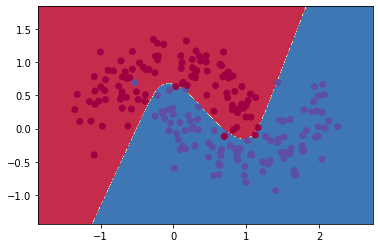

setup #1:  num_hidden_layers=3  nn_hidden_dim=5  actFun_type = Tanh
Loss after iteration 0: -0.002706
Loss after iteration 6000: 0.000850
Loss after iteration 12000: 0.001103
Loss after iteration 18000: 0.001421
Training time: 52.5 seconds


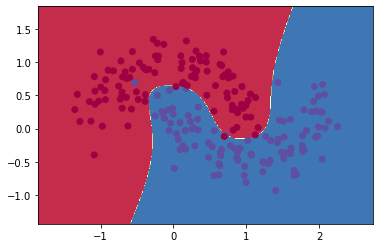

setup #2:  num_hidden_layers=5  nn_hidden_dim=3  actFun_type = Tanh
Loss after iteration 0: -0.002910
Loss after iteration 6000: 0.000914
Loss after iteration 12000: 0.001277
Loss after iteration 18000: 0.001564
Training time: 75.5 seconds


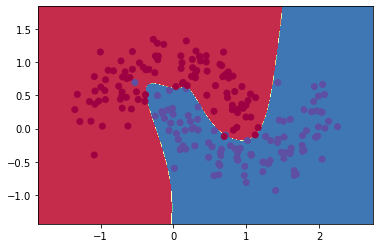

setup #3:  num_hidden_layers=5  nn_hidden_dim=10  actFun_type = Tanh
Loss after iteration 0: -0.002788
Loss after iteration 6000: 0.001849
Loss after iteration 12000: 0.002347
Loss after iteration 18000: 0.002546
Training time: 88.0 seconds


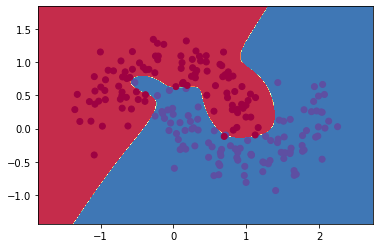

setup #4:  num_hidden_layers=20  nn_hidden_dim=10  actFun_type = Tanh
Loss after iteration 0: 0.001283
Loss after iteration 6000: 0.005160
Loss after iteration 12000: 0.005468
Loss after iteration 18000: 0.005445
Training time: 315.2 seconds


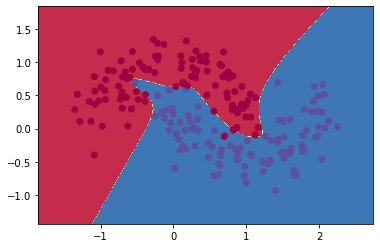

In [11]:
num_configs = 5
configs = {"num_hidden_layers":[1,3,5,5,20],\
           "nn_hidden_dim":[3,5,3,10,10]}
for i in range(num_configs):
    s = time()
    if i == 0:
        case = "{}{}{}".format(bold,"base setup (for the sake of comparison):",bolde)
    else:
        case = "{}{}{}".format(bold,"setup #{}:".format(i),bolde)
    print( case , red_color.format("num_hidden_layers={}".format(configs["num_hidden_layers"][i])) , \
           red_color.format("nn_hidden_dim={}".format(configs["nn_hidden_dim"][i])) , red_color.format("actFun_type = Tanh") )
    model = DeepNeuralNetwork(nn_input_dim=2, num_hidden_layers = configs["num_hidden_layers"][i], \
                              nn_hidden_dim=configs["nn_hidden_dim"][i] , nn_output_dim=2, actFun_type='Tanh')
    model.fit_model(X,y)
    print("Training time:",round(time()-s,1),"seconds")
    model.visualize_decision_boundary(X,y)

<div style="text-align = justify"> The configurations I chose are interesting in the sense that they compare the base case (normal Neural Network) with 3 different versions of the Deep Neural Network. These 3 versions aim for testing the training performance using different number of hidden layers and different sizes for each hidden layer.</div>

<div style="text-align: justify"> (I) Setup 1 and setup 2: These two show that the decision boundary becomes more complex than what we have in the bsae case (moving toward overfitting). What is more interesting here is that The number of hidden units is the same for both of them. The first one is designed for (num_hidden_layers,nn_hidden_dim) equal to (3,5) and this pair for the second one is (5,3). As shown in the figures, although the final loss of both configs is pretty much the same, the decision boundry in the second one (setup 2) tends to be more complex by looking at the peaks. This observation is interesting since it says that having more layers imposes more impact on the decision boundary rather than having more unints per layer. </div>

<div style="text-align: justify"> (II) Setup 3 and setup 4: These two are chosen to show how the model behaves as we add more and more (perhaps unnecessary) parameters. As shown, the model tries to fit as much data point as it can and the decision boundary becomes a lot complex. It also faces some difficulties because of the outliers mentioned before. </div>

# Testing our deep net on another dataset
I picked sklearn's breast_cancer dataset.

In [12]:
def generate_data_new():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    Dataset = datasets.load_breast_cancer()
    X, y = Dataset['data'],Dataset['target']
    return X, y

In [13]:
X, y = generate_data_new()
X.shape

(569, 30)

The data is of 30 dimensions so I won't plot decision boundaries and will only show the loss of training and training time for each setup. Now I'm going to train the deep net using different parameters and ReLu activation function. 

In [14]:
num_configs = 4
configs = {"num_hidden_layers":[1,5,5,10],\
           "nn_hidden_dim":[3,5,10,10]}
for i in range(num_configs):
    s = time()
    if i == 0:
        case = "{}{}{}".format(bold,"base setup (for the sake of comparison):",bolde)
    else:
        case = "{}{}{}".format(bold,"setup #{}:".format(i),bolde)
    print( case , red_color.format("num_hidden_layers={}".format(configs["num_hidden_layers"][i])) , \
           red_color.format("nn_hidden_dim={}".format(configs["nn_hidden_dim"][i])) , red_color.format("actFun_type = ReLu") )
    model = DeepNeuralNetwork(nn_input_dim=30, num_hidden_layers = configs["num_hidden_layers"][i], \
                              nn_hidden_dim=configs["nn_hidden_dim"][i] , nn_output_dim=2, actFun_type='ReLu')
    model.fit_model(X,y)
    print("Training time:",round(time()-s,1),"seconds")

base setup (for the sake of comparison):  num_hidden_layers=1  nn_hidden_dim=3  actFun_type = ReLu
Loss after iteration 0: 0.012875
Loss after iteration 6000: 0.012775
Loss after iteration 12000: 0.012609
Loss after iteration 18000: 0.012444
Training time: 142.4 seconds
setup #1:  num_hidden_layers=5  nn_hidden_dim=5  actFun_type = ReLu
Loss after iteration 0: -0.000998
Loss after iteration 6000: -0.000946
Loss after iteration 12000: -0.000949
Loss after iteration 18000: -0.000952
Training time: 753.0 seconds
setup #2:  num_hidden_layers=5  nn_hidden_dim=10  actFun_type = ReLu
Loss after iteration 0: -0.022277
Loss after iteration 6000: -0.000519
Loss after iteration 12000: -0.000526
Loss after iteration 18000: -0.000534
Training time: 1151.8 seconds
setup #3:  num_hidden_layers=10  nn_hidden_dim=10  actFun_type = ReLu
Loss after iteration 0: -0.000343
Loss after iteration 6000: 0.000621
Loss after iteration 12000: 0.000723
Loss after iteration 18000: 0.000759
Training time: 2302.3 sec

As you can see, for this dataset, 5 layers each having 10 neurons achieves the lowest final loss compared with other architectures.